In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mth
from scipy.spatial.distance import cdist
data=pd.read_csv("https://raw.githubusercontent.com/ThuanLy-0092/NMKHDL/main/College.csv")
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# **Preprocessing**

**Xem sơ lược về thông tin bộ dữ liệu**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

**Xem các biến kiểu categorical**

In [3]:
data.describe(include='O')

,Unnamed: 0,Private
count,777,777
unique,777,2
top,Abilene Christian University,Yes
freq,1,565


**Xem các biến kiểu numberic**

In [4]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**Sửa lại tên cột bị thiếu**

In [5]:
data.rename(columns={'Unnamed: 0': 'University'}, inplace=True)
data.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Kiểm tra null của bộ dữ liệu**

In [6]:
data.isnull().mean()*100

University     0.0
Private        0.0
Apps           0.0
Accept         0.0
Enroll         0.0
Top10perc      0.0
Top25perc      0.0
F.Undergrad    0.0
P.Undergrad    0.0
Outstate       0.0
Room.Board     0.0
Books          0.0
Personal       0.0
PhD            0.0
Terminal       0.0
S.F.Ratio      0.0
perc.alumni    0.0
Expend         0.0
Grad.Rate      0.0
dtype: float64

**Nhận thấy không có null**

**Encode cho cột Private**

In [7]:
data['Private'].value_counts()

Private
Yes    565
No     212
Name: count, dtype: int64

In [8]:
data['Private'] = data['Private'].replace({'Yes':1,'No':0})

C:\Users\Vinh Thuan\AppData\Local\Temp\ipykernel_11304\2170039361.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Private'] = data['Private'].replace({'Yes':1,'No':0})


**Kiểm tra lại sau khi encode**

In [9]:
data['Private'].value_counts()

Private
1    565
0    212
Name: count, dtype: int64

**Xử lí cột University**

In [10]:
from sklearn.preprocessing import LabelEncoder

data["University"]

0        Abilene Christian University
1                  Adelphi University
2                      Adrian College
3                 Agnes Scott College
4           Alaska Pacific University
                    ...              
772           Worcester State College
773                 Xavier University
774    Xavier University of Louisiana
775                   Yale University
776      York College of Pennsylvania
Name: University, Length: 777, dtype: object

In [11]:
data=data.drop(columns="University",axis=1)

**Do khi tiến hành encode University chứa các giá trị unique sẽ làm cho việc encode bị vô nghĩa, nếu dùng label encode sẽ trả về 1 hàng index hoặc onehot sẽ trả ra quá nhiều chiều dữ liệu, vì thế ta sẽ loại bỏ nó khỏi bộ dữ liệu**

In [12]:
y = data["Private"]
X = data.drop(columns="Private")

In [13]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo scaler
scaler = StandardScaler()

# Tiến hành scale sau khi đã tiền xử lí dữ liệu
X = scaler.fit_transform(X)
X

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

# **Implement Kmeans from scratch**

In [14]:
class KMeans:
    def __init__(self, K, tol, max_iter):
        self.K = K   
        self.tol = tol
        self.max_iter = max_iter
        self.cluster_centers_ = None  # Toa do cua tam cum
        self.labels_ = None #Nhan cua moi diem
        self.n_iter_ = 0 #So lan lap 
        self.inertia_ = None #

    def fit(self, X):
        #Đầu tiên tiến hành chọn K cụm
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.K, replace=False)]
        for i in range(self.max_iter):
            #Tính khoảng cách giữa chúng đến các cụm được chia (số cụm =K)
            D = cdist(X, self.cluster_centers_,"euclidean")
            #Với cụm có khoảng cách đến điểm tương ứng nhỏ nhất sẽ được gán nhãn cho điểm dữ liệu
            self.labels_ = np.argmin(D, axis=1)
            #Tính toán trung tâm cụm mới
            new_centers = np.array([X[self.labels_ == k].mean(axis=0) for k in range(self.K)])
            #Tính khoảng cách giữa trung tâm của cụm gần nhất và điểm dữ liệu
            wcv = np.sum(np.min(D, axis=1)**2)
            print(f">> iters: {self.n_iter_} - wcv: {wcv}")
            #Nếu nó đạt ngưỡng hội tụ sẽ cho dừng vòng lặp
            if np.allclose(self.cluster_centers_, new_centers, atol=self.tol):
                break
            #Nếu không sẽ tiếp tục chạy đến khi nào đạt số lần lặp tối đa
            self.cluster_centers_ = new_centers
            self.n_iter_ += 1
        #Tiến hành cập nhật, tính khoảng cách đến trung tâm cụm gần nhất
        D = cdist(X, self.cluster_centers_)
        self.inertia_ = np.sum(np.min(D, axis=1)**2)

    def transform(self, X):
        return cdist(X, self.cluster_centers_,'euclidean')

    def predict(self, X):
        D = cdist(X, self.cluster_centers_,'euclidean')
        return np.argmin(D, axis=1)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)


# **Testing and Validation:**

## Test  MyKMeans class implementation on the provided dataset

In [15]:
K=4
tol=1e-4
max_iter=100

kmeans1 = KMeans(K,tol,max_iter)
labels=kmeans1.fit_predict(X)
kmeans_fromscratch_inertia= kmeans1.inertia_

>> iters: 0 - wcv: 12196.062920352913
>> iters: 1 - wcv: 8005.402005284682
>> iters: 2 - wcv: 7737.335043562625
>> iters: 3 - wcv: 7659.621803271384
>> iters: 4 - wcv: 7633.96572377241
>> iters: 5 - wcv: 7627.349811656479
>> iters: 6 - wcv: 7626.658834656723


In [16]:
print(f"MyKMeans inertia: {kmeans_fromscratch_inertia:.4f}")

MyKMeans inertia: 7626.6588


## Comparing results with sklearn's KMeans implementation.


In [17]:
from sklearn.cluster import KMeans as sklearn_Kmeans
kmeans2 = sklearn_Kmeans(n_clusters=K, tol=tol, max_iter=max_iter)
kmeans2.fit(X)
centroids = kmeans2.cluster_centers_
labels = kmeans2.labels_
new_labels = kmeans2.predict(X)
kmeans_sklearn_inertia=kmeans2.inertia_


In [18]:
print(f"MyKMeans inertia: {kmeans_fromscratch_inertia:.4f}")
print(f"Scikit-learn KMeans inertia: {kmeans_sklearn_inertia:.4f}")



MyKMeans inertia: 7626.6588
Scikit-learn KMeans inertia: 7626.1201


**Nhận ra Tổng khoảng cách bình phương của các mẫu đến trung tâm cụm gần nhất của cả 2 mô hình có chênh lệch không đáng kể, do cách chúng chọn mẫu là khác nhau**

**Vì vậy ta thấy rằng MyKmeans đã hoạt động**

## Choose an optimal value based on appropriate evaluation metrics (e.g., silhouette score, elbow method).


>> iters: 0 - wcv: 14822.619091699002
>> iters: 1 - wcv: 10817.95301089366
>> iters: 2 - wcv: 10780.099213990728
>> iters: 3 - wcv: 10773.534001816835
>> iters: 4 - wcv: 10769.157197645109
>> iters: 5 - wcv: 10768.25903602755
>> iters: 6 - wcv: 10766.74522815178
>> iters: 7 - wcv: 10763.442801182831
>> iters: 8 - wcv: 10762.49675984098
>> iters: 9 - wcv: 10761.347233641969
>> iters: 10 - wcv: 10761.185930309599
>> iters: 0 - wcv: 15519.656626271722
>> iters: 1 - wcv: 9712.285402056506
>> iters: 2 - wcv: 8685.11522858893
>> iters: 3 - wcv: 8341.989302645057
>> iters: 4 - wcv: 8272.047747507926
>> iters: 5 - wcv: 8262.9948102138
>> iters: 6 - wcv: 8259.308269477831
>> iters: 7 - wcv: 8257.656975294989
>> iters: 8 - wcv: 8256.846183842497
>> iters: 9 - wcv: 8255.90411759236
>> iters: 10 - wcv: 8254.86049720868
>> iters: 11 - wcv: 8254.69288115958
>> iters: 12 - wcv: 8254.56270951222
>> iters: 13 - wcv: 8254.444647603483
>> iters: 0 - wcv: 14245.883515673831
>> iters: 1 - wcv: 8876.7162682

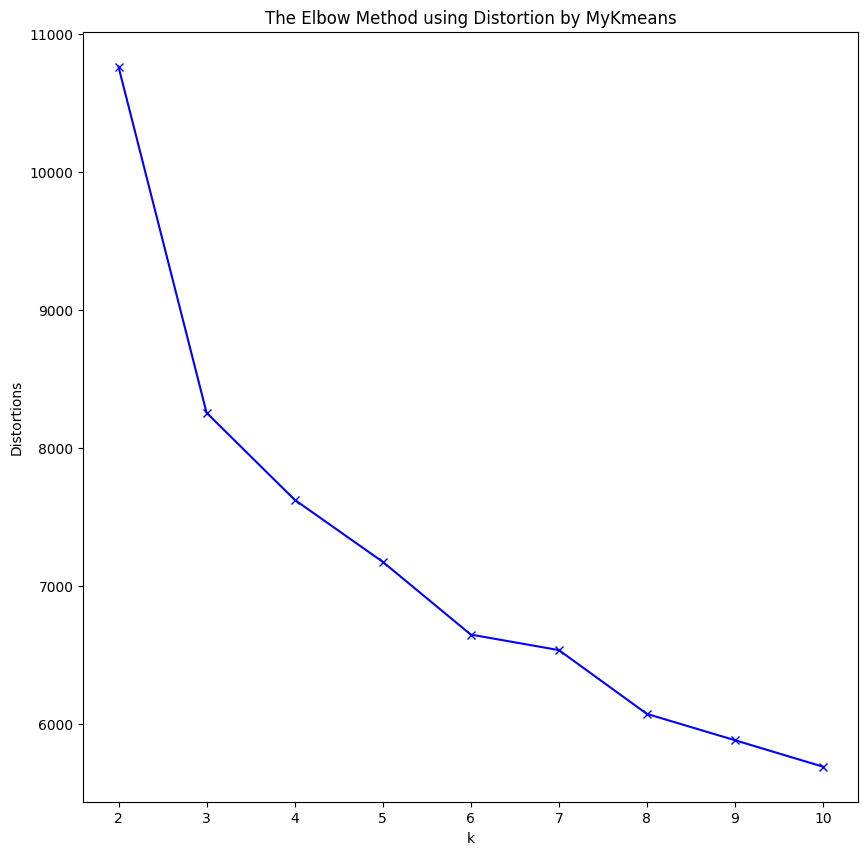

In [19]:
# Tạo danh sách K từ 2 đến 10
K = list(range(2, 11, 1))
distortions_MyKmeans = []
distortions_sklearn_Kmeans = []

# Tính toán distortions cho từng giá trị của K
for k in K:
    Mykmeans = KMeans(k, tol,max_iter)
    Mykmeans.fit(X)
    distortions_MyKmeans.append(Mykmeans.inertia_)
    skln_Kmeans=sklearn_Kmeans(n_clusters=k, tol=tol, max_iter=max_iter)
    skln_Kmeans.fit(X)
    distortions_sklearn_Kmeans.append(skln_Kmeans.inertia_)

# Vẽ biểu đồ Elbow Method
plt.figure(figsize=(10, 10))
plt.plot(K, distortions_MyKmeans, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow Method using Distortion by MyKmeans')
plt.show()

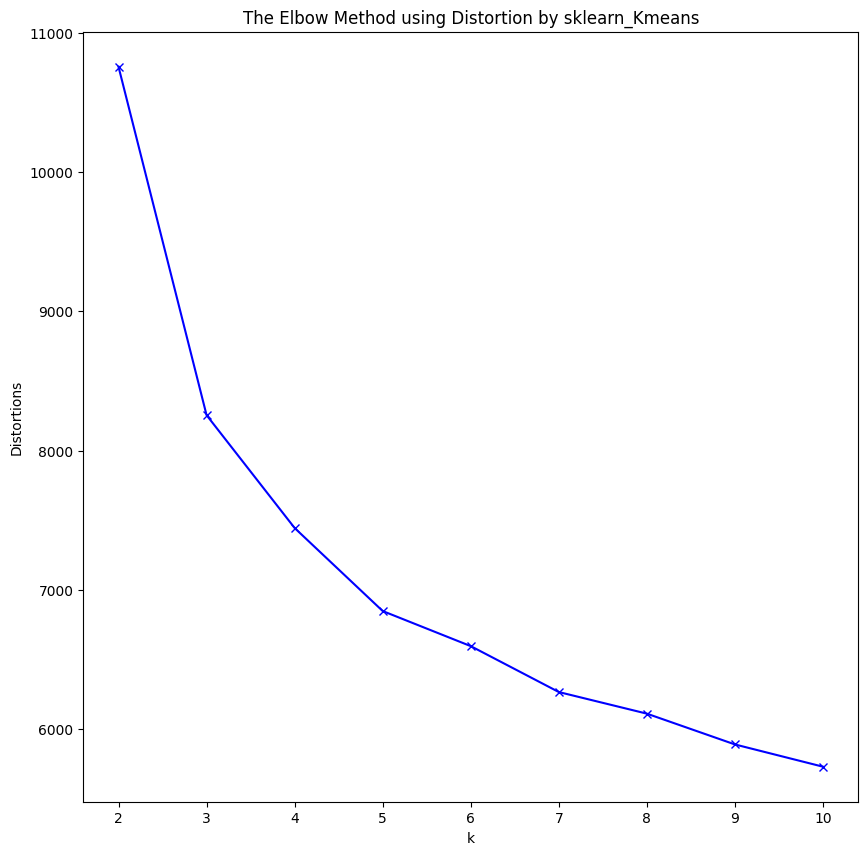

In [20]:
plt.figure(figsize=(10, 10))
plt.plot(K, distortions_sklearn_Kmeans, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow Method using Distortion by sklearn_Kmeans')
plt.show()

>> iters: 0 - wcv: 16272.845855807871
>> iters: 1 - wcv: 10552.410057792456
>> iters: 2 - wcv: 10513.057026989372
>> iters: 3 - wcv: 10503.878181136099
>> iters: 4 - wcv: 10490.145158283414
>> iters: 5 - wcv: 10478.347598519407
>> iters: 6 - wcv: 10474.405323987463
>> iters: 7 - wcv: 10472.772385227872
>> iters: 8 - wcv: 10470.787186227026
>> iters: 9 - wcv: 10469.613662404921
>> iters: 10 - wcv: 10469.53468352414
>> iters: 0 - wcv: 12244.856875940543
>> iters: 1 - wcv: 10262.25487174463
>> iters: 2 - wcv: 9843.12334685957
>> iters: 3 - wcv: 9132.0587525365
>> iters: 4 - wcv: 8633.608840701847
>> iters: 5 - wcv: 8425.050040755437
>> iters: 6 - wcv: 8337.052553271416
>> iters: 7 - wcv: 8298.80278023372
>> iters: 8 - wcv: 8284.389754839187
>> iters: 9 - wcv: 8270.310897474932
>> iters: 10 - wcv: 8262.500622648291
>> iters: 11 - wcv: 8255.234841374786
>> iters: 12 - wcv: 8254.676651260528
>> iters: 13 - wcv: 8254.549298598748
>> iters: 14 - wcv: 8254.50452037304
>> iters: 0 - wcv: 16783.1

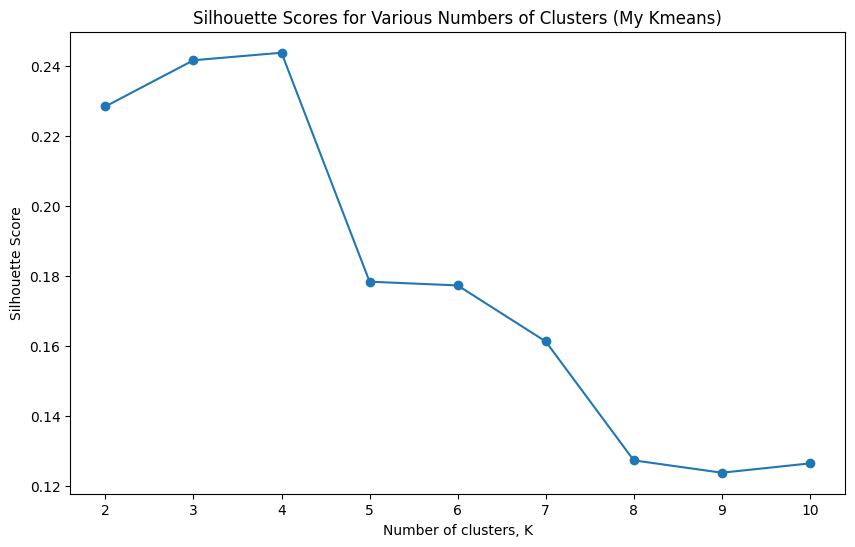

In [21]:
from sklearn.metrics import silhouette_score
silhouette_avg_scores_MyKmeans = []
silhouette_avg_scores_sklearn_Kmeans =[]
for k in K:
    # Khởi tạo KMeans và huấn luyện (MyKmeans)
    kmeans4 = KMeans(k,tol,max_iter)
    cluster_labels_MyKmeans = kmeans4.fit_predict(X)
     #sklearn Kmeans
    skln_Kmeans=sklearn_Kmeans(k,tol=tol,max_iter=max_iter)
    cluster_labels_sklearn_Kmeans=skln_Kmeans.fit_predict(X)
    # Tính toán silhouette score
    silhouette_avg_MyKmeans = silhouette_score(X, cluster_labels_MyKmeans)
    silhouette_avg_scores_MyKmeans.append(silhouette_avg_MyKmeans)

    silhouette_avg_sklearn_Kmeans =silhouette_score(X, cluster_labels_sklearn_Kmeans)
    silhouette_avg_scores_sklearn_Kmeans.append(silhouette_avg_sklearn_Kmeans)
    
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_avg_scores_MyKmeans, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters (My Kmeans)')
plt.xlabel('Number of clusters, K')
plt.ylabel('Silhouette Score')
plt.show()



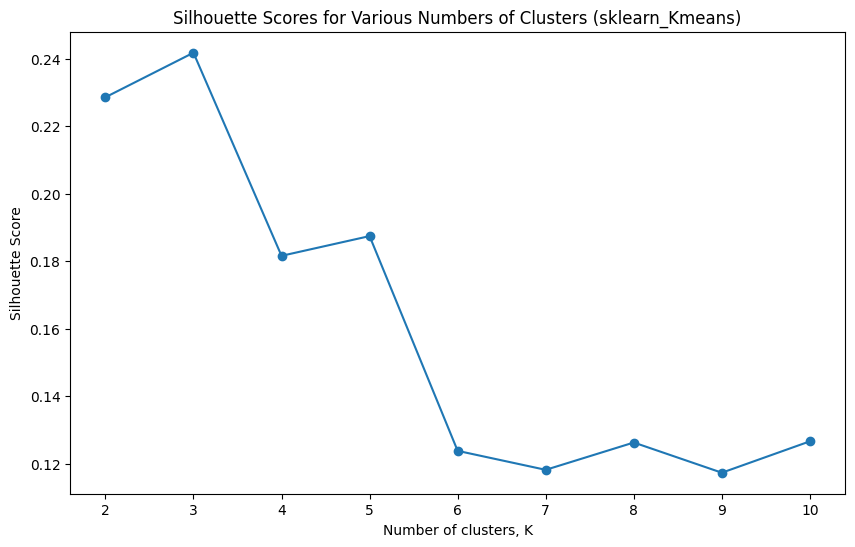

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_avg_scores_sklearn_Kmeans, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters (sklearn_Kmeans)')
plt.xlabel('Number of clusters, K')
plt.ylabel('Silhouette Score')
plt.show()

**Nhận thấy 2 plot của 2 mô hình không khác nhau mấy, nên ta sẽ chọn chung 1 K cho cả 2. Chúng sẽ khác nhau ở khâu chọn mẫu do mẫu được chọn ngẫu nhiên.**

In [23]:
df = pd.DataFrame({
    'K': range(2, 11),
    'Silhouette Score': silhouette_avg_scores_MyKmeans,
    'Distortion': distortions_MyKmeans
})
df

,K,Silhouette Score,Distortion
0,2,0.228549,10761.185930
1,3,0.241743,8254.444648
2,4,0.243896,7624.233826
3,5,0.178483,7174.952775
4,6,0.177413,6647.759519
5,7,0.161400,6535.296448
6,8,0.127434,6073.111738
7,9,0.123903,5882.448785
8,10,0.126570,5690.531236


**Từ 2 phương pháp elbow và silhouette ta thấy được điểm khuỷu tay khi dùng elbow sẽ rơi vào k=4 và k=5, Nhưng khi quan sát Silhouette Score thì thấy nó đạt max ở k=3, và bắt đầu giảm dần ngay sau đó. Vì vậy nên ta sẽ chọn k=4, khi đó nó sẽ có cả 2 thông số Silhouette score và Distortion ở mức tốt. (Mặc dù Silhouette không ở mức tốt nhất, nhưng distortion sẽ được cải thiện đáng kể)**

In [24]:
best_K=4

## Test MyKmeans with the Private attribute 

**Test 1 lần chạy ngẫu nhiên**

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
Mykmeans = KMeans(2,tol,max_iter)
labels = Mykmeans.fit_predict(X)

>> iters: 0 - wcv: 12831.69818474107
>> iters: 1 - wcv: 10671.619902570732
>> iters: 2 - wcv: 10598.856871416294
>> iters: 3 - wcv: 10583.952871435224
>> iters: 4 - wcv: 10571.17950700792
>> iters: 5 - wcv: 10556.210334882911
>> iters: 6 - wcv: 10548.720529548627
>> iters: 7 - wcv: 10547.257551840581
>> iters: 8 - wcv: 10545.530792248006
>> iters: 9 - wcv: 10538.132368205008
>> iters: 10 - wcv: 10530.302556738015
>> iters: 11 - wcv: 10517.593224263048
>> iters: 12 - wcv: 10505.868923336158
>> iters: 13 - wcv: 10493.666142112872
>> iters: 14 - wcv: 10483.589205698483
>> iters: 15 - wcv: 10477.378846511112
>> iters: 16 - wcv: 10474.050913773675
>> iters: 17 - wcv: 10473.047405206167
>> iters: 18 - wcv: 10472.855535872175
>> iters: 19 - wcv: 10471.486110656238
>> iters: 20 - wcv: 10469.613662404921
>> iters: 21 - wcv: 10469.53468352414


**So sánh các nhãn mà mô hình gắn so với Private**

In [26]:
MyKmeans_df = pd.DataFrame({'Cluster Labels Sklearn Kmeans': labels,'Ground Truth': y})
MyKmeans_df

,Cluster Labels Sklearn Kmeans,Ground Truth
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
772,1,0
773,1,1
774,1,1
775,0,1


In [27]:
# Tính toán các metric
accuracy_MyKmeans = accuracy_score(y, labels)
precision_MyKmeans = precision_score(y, labels)
recall_MyKmeans = recall_score(y, labels)
f1_MyKmeans = f1_score(y, labels)

# In kết quả
print("My Kmeans metrics:\n")
print("avg_Accuracy:", accuracy_MyKmeans)
print("avg_Precision:", precision_MyKmeans)
print("avg_Recall:", recall_MyKmeans)
print("avg_F1-score:", f1_MyKmeans)

My Kmeans metrics:

avg_Accuracy: 0.5225225225225225
avg_Precision: 0.6995884773662552
avg_Recall: 0.6017699115044248
avg_F1-score: 0.6470028544243578


**Cho chạy 10 lần để tính avg các metrics**

In [28]:
# Khởi tạo list để lưu trữ các giá trị metric
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Số lần chạy
n = 10

for _ in range(n):
    Mykmeans = KMeans(2, tol, max_iter)
    cluster_labels = Mykmeans.fit_predict(X)
    
    # Tính toán các metric và thêm vào list
    accuracy_scores.append(accuracy_score(y, cluster_labels))
    precision_scores.append(precision_score(y, cluster_labels))
    recall_scores.append(recall_score(y, cluster_labels))
    f1_scores.append(f1_score(y, cluster_labels))

avg_accuracy_MyKmeans = np.mean(accuracy_scores)
avg_precision_MyKmeans = np.mean(precision_scores)
avg_recall_MyKmeans = np.mean(recall_scores)
avg_f1_MyKmeans = np.mean(f1_scores)

>> iters: 0 - wcv: 18806.959985562964
>> iters: 1 - wcv: 10774.266731466887
>> iters: 2 - wcv: 10697.42531317729
>> iters: 3 - wcv: 10694.271895001435
>> iters: 0 - wcv: 13382.57361880229
>> iters: 1 - wcv: 10650.021558608474
>> iters: 2 - wcv: 10583.773949856411
>> iters: 3 - wcv: 10546.395144216862
>> iters: 4 - wcv: 10522.889171579314
>> iters: 5 - wcv: 10511.794811216818
>> iters: 6 - wcv: 10503.911916033321
>> iters: 7 - wcv: 10490.000353963498
>> iters: 8 - wcv: 10478.108650984705
>> iters: 9 - wcv: 10474.285453371735
>> iters: 10 - wcv: 10472.495740987139
>> iters: 11 - wcv: 10470.000779692022
>> iters: 12 - wcv: 10469.57211645657
>> iters: 0 - wcv: 15468.553065198597
>> iters: 1 - wcv: 11028.373190380154
>> iters: 2 - wcv: 10778.052044533273
>> iters: 3 - wcv: 10758.044368572391
>> iters: 4 - wcv: 10756.697755916644
>> iters: 5 - wcv: 10756.3864744106
>> iters: 6 - wcv: 10756.213108785352
>> iters: 0 - wcv: 15262.086763947573
>> iters: 1 - wcv: 10822.537939269723
>> iters: 2 - 

In [29]:
df1 = {
    'avg_Accuracy': [avg_accuracy_MyKmeans],
    'avg_Precision': [avg_precision_MyKmeans],
    'avg_Recall': [avg_recall_MyKmeans],
    'avg_F1-score': [avg_f1_MyKmeans]
}
df_mykmeans = pd.DataFrame(df1, index=['MyKmeans'])
df_mykmeans


,avg_Accuracy,avg_Precision,avg_Recall,avg_F1-score
MyKmeans,0.632046,0.774658,0.683894,0.70839


## Test sklearn_Kmeans with the Private attribute 

**Test thử 1 lần chạy ngẫu nhiên**

In [30]:
sk_kmeans = sklearn_Kmeans(n_clusters=2, tol=tol, max_iter=max_iter)
sk_kmeans.fit(X)
cluster_labels = sk_kmeans.predict(X)


**So sánh các nhãn mà mô hình gắn so với Private**

In [31]:
sklearn_Kmeans_df = pd.DataFrame({'Cluster Labels Sklearn Kmeans': cluster_labels,'Ground Truth': y})
sklearn_Kmeans_df

,Cluster Labels Sklearn Kmeans,Ground Truth
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
772,1,0
773,1,1
774,1,1
775,0,1


In [32]:
# Tính toán các metric
accuracy_sklearn_Kmeans = accuracy_score(y, cluster_labels)
precision_sklearn_Kmeans = precision_score(y, cluster_labels)
recall_sklearn_Kmeans = recall_score(y, cluster_labels)
f1_sklearn_Kmeans = f1_score(y, cluster_labels)

print("avg_Accuracy:", accuracy_sklearn_Kmeans)
print("avg_Precision:", precision_sklearn_Kmeans)
print("avg_Recall:", recall_sklearn_Kmeans)
print("avg_F1-score:", f1_sklearn_Kmeans)

avg_Accuracy: 0.5225225225225225
avg_Precision: 0.6995884773662552
avg_Recall: 0.6017699115044248
avg_F1-score: 0.6470028544243578


**Cho chạy 10 lần để tính avg các metrics**

In [33]:
# Khởi tạo list để lưu trữ các giá trị metric
accuracy_scores_sklearn = []
precision_scores_sklearn = []
recall_scores_sklearn = []
f1_scores_sklearn = []

# Số lần chạy
n = 10

for _ in range(n):
    sk_kmeans = sklearn_Kmeans(n_clusters=2, tol=tol, max_iter=max_iter)
    sk_kmeans.fit(X)
    cluster_labels = sk_kmeans.predict(X)
    
    # Tính toán các metric và thêm vào list
    accuracy_scores_sklearn.append(accuracy_score(y, cluster_labels))
    precision_scores_sklearn.append(precision_score(y, cluster_labels))
    recall_scores_sklearn.append(recall_score(y, cluster_labels))
    f1_scores_sklearn.append(f1_score(y, cluster_labels))

# Tính toán trung bình của các metric sử dụng np.mean()
avg_accuracy_sklearn_Kmeans = np.mean(accuracy_scores_sklearn)
avg_precision_sklearn_Kmeans = np.mean(precision_scores_sklearn)
avg_recall_sklearn_Kmeans = np.mean(recall_scores_sklearn)
avg_f1_sklearn_Kmeans = np.mean(f1_scores_sklearn)

In [34]:
df2 = {
    'avg_Accuracy': [avg_accuracy_sklearn_Kmeans],
    'avg_Precision': [avg_precision_sklearn_Kmeans],
    'avg_Recall': [avg_recall_sklearn_Kmeans],
    'avg_F1-score': [avg_f1_sklearn_Kmeans]
}
df_sklearn_Kmeans = pd.DataFrame(df2, index=['sklearn_Kmeans'])
df_sklearn_Kmeans


,avg_Accuracy,avg_Precision,avg_Recall,avg_F1-score
sklearn_Kmeans,0.403732,0.565634,0.368673,0.425889


## Compare the results of MyKmeans and the Sklearn K-means

**Với nhãn thực tế được cho sẵn ta sẽ không dùng ARI mà sẽ dùng các metrics bên dưới:**

**Ta sẽ đánh giá chúng thông qua các metrics về độ trùng khớp**

**Accuracy = số lượng dự đoán đúng / tổng mẫu** <br>
**Precision = True_Positive/True_Positive + False_Positive** <br>
**Recall = True_Positive/True_Posituve + False_Negative**<br>
**F1 =2 * Recall * Precision /(Precision + Recall)**<br>

**=>Với 3 metrics ở dưới mà trong các trường hợp khác nhau người ta sẽ quyết định ưu tiên cái nào hơn, nếu muốn cải thiện cả 2 có thể dùng metric F1 score để làm điều đó, Với accuracy_score sẽ mang lại nhìn tổng quan nhất trên tập dữ liệu, trong trường hợp không biết nên ưu tiên cái nào thì ta nên dùng accuracy_score và F1_score để đánh giá**

In [35]:
merge_metrics = pd.concat([df_mykmeans, df_sklearn_Kmeans])
merge_metrics

,avg_Accuracy,avg_Precision,avg_Recall,avg_F1-score
MyKmeans,0.632046,0.774658,0.683894,0.708390
sklearn_Kmeans,0.403732,0.565634,0.368673,0.425889


**Với kết quả nhận được ta thấy ở cả 2 mô hình không có độ chênh lệch quá lớn, có những trường hợp xảy ra số liệu chênh lệch nhiều là do quá trình chọn mẫu, 1 trong 2 mô hình đã chọn mẫu không được tốt dẫn đến ảnh hưởng hiệu suất của mô hình**

# **Analysis and Interpretation:**

**Dùng PCA giảm chiều dữ liệu để có thể plot nó dễ dàng hơn**

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [37]:
# Khởi tạo và fit mô hình KMeans
Mykmeans = KMeans(best_K,tol,max_iter)
# Lấy ra các trung tâm cụm và nhãn của các điểm dữ liệu
labels_Mykmeans = Mykmeans.fit_predict(X)
centroids_Mykmeans = Mykmeans.cluster_centers_
kmeans_fromscratch_inertia=Mykmeans.inertia_


sklearn_kmeans= sklearn_Kmeans(n_clusters=best_K, tol=tol, max_iter=max_iter)
# Lấy ra các trung tâm cụm và nhãn của các điểm dữ liệu
labels_sklearn_kmeans = sklearn_kmeans.fit_predict(X)
centroids_sklearn_kmeans = sklearn_kmeans.cluster_centers_
kmeans_sklearn_inertia=sklearn_kmeans.inertia_

>> iters: 0 - wcv: 3578.8069039480083
>> iters: 1 - wcv: 2427.6012277743075
>> iters: 2 - wcv: 2343.025713087245
>> iters: 3 - wcv: 2308.229598991822
>> iters: 4 - wcv: 2290.751243800355
>> iters: 5 - wcv: 2285.262256321975
>> iters: 6 - wcv: 2284.496305741534
>> iters: 7 - wcv: 2283.714050729242
>> iters: 8 - wcv: 2282.082886587429
>> iters: 9 - wcv: 2280.709208665725
>> iters: 10 - wcv: 2279.666912577232
>> iters: 11 - wcv: 2278.8508305745536
>> iters: 12 - wcv: 2278.5310042625174
>> iters: 13 - wcv: 2278.480546049813


In [38]:
print(f"MyKMeans inertia: {kmeans_fromscratch_inertia:.4f}")
print(f"Scikit-learn KMeans inertia: {kmeans_sklearn_inertia:.4f}")

MyKMeans inertia: 2278.4805
Scikit-learn KMeans inertia: 2278.4805


Text(0.5, 1.0, 'sklearn_Kmeans clustering')

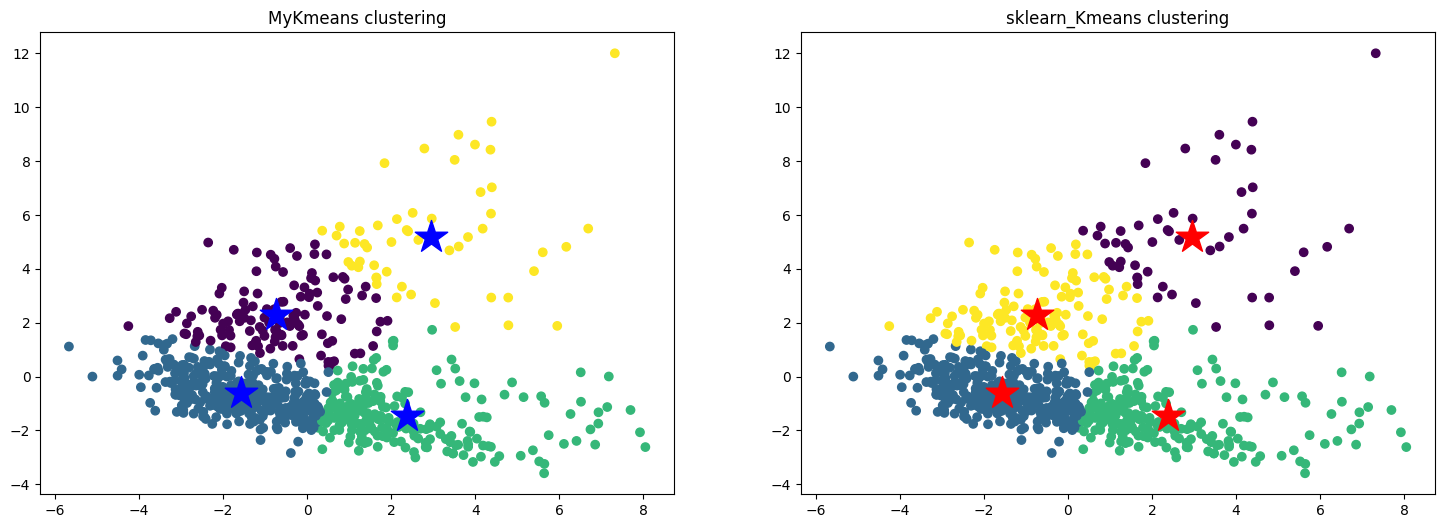

In [39]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1 )
plt.scatter(X[:, 0], X[:, 1], c=labels_Mykmeans, cmap='viridis')
plt.scatter(centroids_Mykmeans[:, 0], centroids_Mykmeans[:, 1], marker='*', s=600, c="blue", label='Centroids')
plt.title('MyKmeans clustering')

plt.subplot(1, 2, 2 )
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn_kmeans, cmap='viridis')
plt.scatter(centroids_sklearn_kmeans[:, 0], centroids_sklearn_kmeans[:, 1], marker='*', s=600, c="red", label='Centroids')
plt.title('sklearn_Kmeans clustering')
